<div align="center">
    <h2>24DS736 – Deep Learning for Visual Recognition</h2>
    <h3>M.Tech Data Science (2024-2026)</h3>
</div>


#### Name: Sweta Swaminathan
#### Roll No: CB.SC.P2DSC24020

#### 1.	Design the deep convolutional neural network based on the user input. Compute the number of learnable parameters in each layer. The design of the architecture and the number of learnable parameters must be printed. (Comments are required for the understandability of the logic behind the code. Convolution layer computation can be written as function file. Direct function available as built-in library package must not be used).                                                                                                                                                           

In [22]:
import numpy as np

# Function to calculate parameters for convolutional layers
def conv_layer_params(kernel_size, input_channels, output_channels):
    return (kernel_size * kernel_size * input_channels + 1) * output_channels

# Function to calculate parameters for fully connected layers
def fc_layer_params(input_units, output_units):
    return (input_units * output_units) + output_units

# Function to define the architecture and calculate parameters based on user input
def define_architecture():
    input_shape = tuple(map(int, input("Enter input shape as channel,height,width (e.g., 1,28,28): ").split(",")))
    conv1_filters = int(input("Enter number of filters for Convolutional Layer 1: "))
    conv1_kernel_size = int(input("Enter kernel size for Convolutional Layer 1: "))
    conv2_filters = int(input("Enter number of filters for Convolutional Layer 2: "))
    conv2_kernel_size = int(input("Enter kernel size for Convolutional Layer 2: "))
    fc_units = int(input("Enter number of units for Fully Connected Layer: "))
    output_units = int(input("Enter number of units for Output Layer: "))

    # Calculate parameters for each layer
    params_conv1 = conv_layer_params(conv1_kernel_size, input_shape[0], conv1_filters)
    params_pool1 = 0  # Pooling layers have no parameters
    params_conv2 = conv_layer_params(conv2_kernel_size, conv1_filters, conv2_filters)
    params_pool2 = 0  # Pooling layers have no parameters
    params_fc = fc_layer_params(conv2_filters * 12 * 12, fc_units)  # Assuming input size after pooling
    params_output = fc_layer_params(fc_units, output_units)

    # Print the architecture and parameters
    print("\nCNN Architecture:")
    print("1. Input Layer: {}x{} grayscale images".format(input_shape[1], input_shape[2]))
    print(f"2. Convolutional Layer 1: {conv1_filters} filters of size {conv1_kernel_size}x{conv1_kernel_size} -> Parameters: {params_conv1}")
    print(f"3. Max Pooling Layer 1 -> Parameters: {params_pool1}")
    print(f"4. Convolutional Layer 2: {conv2_filters} filters of size {conv2_kernel_size}x{conv2_kernel_size} -> Parameters: {params_conv2}")
    print(f"5. Max Pooling Layer 2 -> Parameters: {params_pool2}")
    print(f"6. Fully Connected Layer: {fc_units} units -> Parameters: {params_fc}")
    print(f"7. Output Layer: {output_units} units -> Parameters: {params_output}")

    # Total parameters
    total_params = params_conv1 + params_pool1 + params_conv2 + params_pool2 + params_fc + params_output
    print(f"\nTotal Learnable Parameters: {total_params}")

# Call the function to define the architecture and calculate parameters
define_architecture()


Enter input shape as channel,height,width (e.g., 1,28,28):  1, 28, 28
Enter number of filters for Convolutional Layer 1:  32
Enter kernel size for Convolutional Layer 1:  3
Enter number of filters for Convolutional Layer 2:  64
Enter kernel size for Convolutional Layer 2:  3
Enter number of units for Fully Connected Layer:  128
Enter number of units for Output Layer:  10



CNN Architecture:
1. Input Layer: 28x28 grayscale images
2. Convolutional Layer 1: 32 filters of size 3x3 -> Parameters: 320
3. Max Pooling Layer 1 -> Parameters: 0
4. Convolutional Layer 2: 64 filters of size 3x3 -> Parameters: 18496
5. Max Pooling Layer 2 -> Parameters: 0
6. Fully Connected Layer: 128 units -> Parameters: 1179776
7. Output Layer: 10 units -> Parameters: 1290

Total Learnable Parameters: 1199882


### 2.	Identify a dataset and build your own deep convolutional neural network architecture for the following:
### (a)	Classification (binary)                                                                                                                        

### (b)	Classification (multi-class)
### Built-in library packages can be used to implement this question. Plot the loss curves. Print the performance evaluation measures.


### (a)	Classification (binary)  

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Path to the dataset
train_dir = r'C:\Users\USER\OneDrive\Desktop\Mtech\s2\archive (1)\final dataset used for oil spill\dataset-final\dataset\train'
test_dir = r'C:\Users\USER\OneDrive\Desktop\Mtech\s2\archive (1)\final dataset used for oil spill\dataset-final\dataset\test'

# Image parameters
img_width, img_height = 128, 128  # Resize images
batch_size = 32  # Batch size for training
num_classes = 2  # Binary classification (oil spill or not)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,  # Split 20% of training data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)  # Only rescaling for test data

# Flow images in batches from the directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',  # Binary classification
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 20
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)


Found 2240 images belonging to 2 classes.
Found 560 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


D:\jupyter\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
D:\jupyter\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5740 - loss: 0.6895 - val_accuracy: 0.7232 - val_loss: 0.5905
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 106s 2s/step - accuracy: 0.6950 - loss: 0.6310 - val_accuracy: 0.7357 - val_loss: 0.5080
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 107s 2s/step - accuracy: 0.7277 - loss: 0.5662 - val_accuracy: 0.7696 - val_loss: 0.4649
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 109s 2s/step - accuracy: 0.7674 - loss: 0.4981 - val_accuracy: 0.8214 - val_loss: 0.4448
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.7843 - loss: 0.4579 - val_accuracy: 0.7554 - val_loss: 0.4872
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.7817 - loss: 0.4882 - val_accuracy: 0.8196 - val_loss: 0.3776
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.7962 - loss: 0.4374 - val_accuracy: 0.8321 - val_loss: 0.3604
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8199 - loss: 0.3866 - val_accuracy: 0.8411 - v

19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 598ms/step - accuracy: 0.9164 - loss: 0.2280
Test Loss: 0.23454886674880981
Test Accuracy: 0.9116666913032532


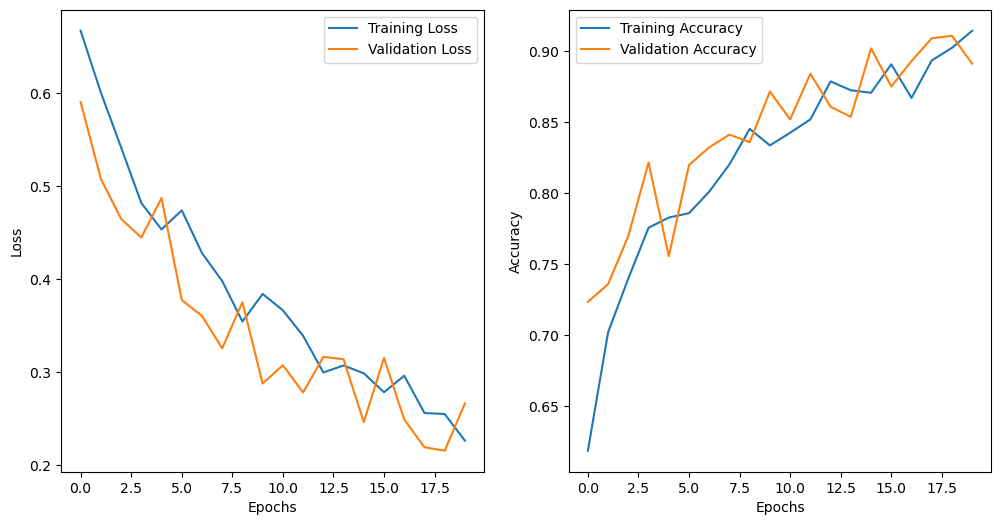

In [6]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### (b)	Classification (multi-class)

In [31]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set the path to the training directory
train_dir = 'C:/Users/USER/OneDrive/Desktop/Mtech/s2/alphabet/asl_alphabet_train'

# Image parameters
img_width, img_height = 128, 128  # Resize images to 128x128
batch_size = 32  # Batch size for training
num_classes = 28  # Number of classes in the dataset (ASL alphabet has 26 letters + space + delete + nothing)

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    validation_split=0.2,  # Split 20% of the data for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10  
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs
)



Found 67200 images belonging to 28 classes.
Found 16800 images belonging to 28 classes.
Epoch 1/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 831s 395ms/step - accuracy: 0.1490 - loss: 2.8859 - val_accuracy: 0.4151 - val_loss: 1.8256
Epoch 2/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 821s 391ms/step - accuracy: 0.4958 - loss: 1.4856 - val_accuracy: 0.6058 - val_loss: 1.1473
Epoch 3/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 824s 392ms/step - accuracy: 0.6417 - loss: 1.0325 - val_accuracy: 0.6538 - val_loss: 0.9653
Epoch 4/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 815s 388ms/step - accuracy: 0.7130 - loss: 0.8252 - val_accuracy: 0.7126 - val_loss: 0.8246
Epoch 5/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 831s 396ms/step - accuracy: 0.7560 - loss: 0.7003 - val_accuracy: 0.7314 - val_loss: 0.7746
Epoch 6/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 854s 407ms/step - accuracy: 0.7866 - loss: 0.6088 - val_accuracy: 0.7430 - val_loss: 0.7767
Epoch 7/10
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 853s 406ms/step - accuracy: 0.8100 - loss: 0.5451 - val_accuracy: 

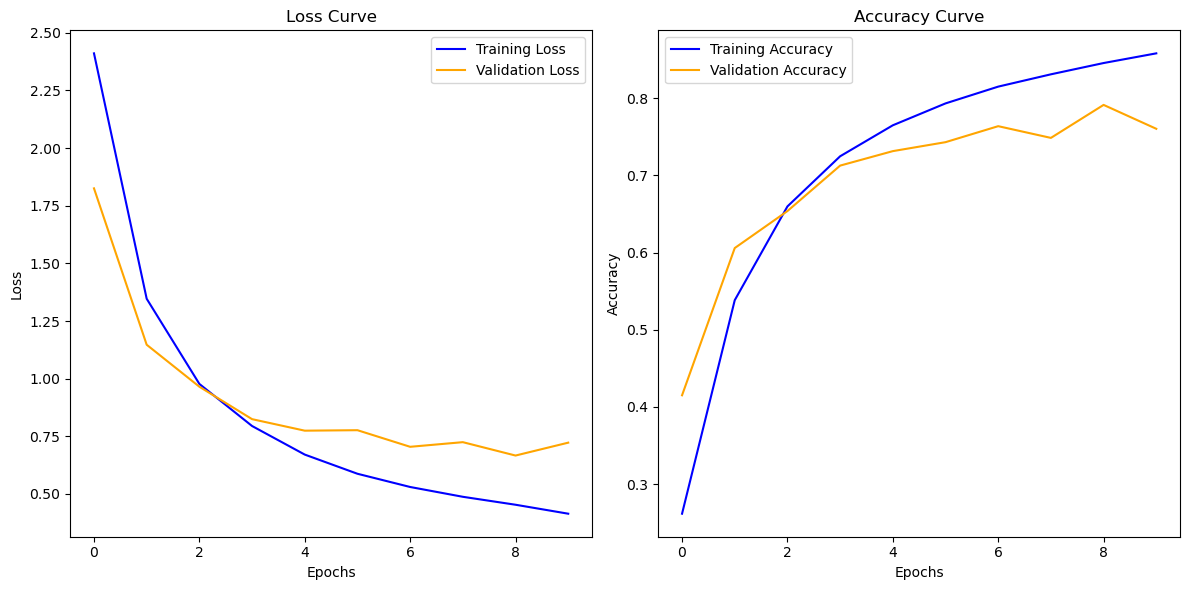

In [33]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


### 3.	Identify a dataset for multi-class classification which has the scope to apply the transfer learning technique. Built-in library packages can be used to implement this question. Plot the loss curves. Print the performance evaluation measures.                                         (10 marks)

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# Set dataset paths
train_dir = r'C:\Users\USER\OneDrive\Desktop\Mtech\s2\intel\seg_train\seg_train'
test_dir = r'C:\Users\USER\OneDrive\Desktop\Mtech\s2\intel\seg_test\seg_test'

# Image parameters
img_width, img_height = 224, 224
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,  # Split 20% of training data for validation
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Training and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
base_model.trainable = False  # Freeze pre-trained layers

# Add custom layers on top of VGG16
x = base_model.output
x = Flatten()(x)  # Use Flatten instead of GlobalAveragePooling2D
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)  # Number of classes from data generator

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# Train the model
epochs = 10
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=epochs,
)



Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 4032s 11s/step - accuracy: 0.6245 - loss: 0.9683 - val_accuracy: 0.8135 - val_loss: 0.5115
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 1941s 6s/step - accuracy: 0.7822 - loss: 0.5758 - val_accuracy: 0.8388 - val_loss: 0.4272
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2000s 6s/step - accuracy: 0.8096 - loss: 0.5043 - val_accuracy: 0.8563 - val_loss: 0.3964
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 2262s 6s/step - accuracy: 0.8309 - loss: 0.4563 - val_accuracy: 0.8563 - val_loss: 0.3857
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 8278s 24s/step - accuracy: 0.8352 - loss: 0.4488 - val_accuracy: 0.8459 - val_loss: 0.4108
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 1820s 5s/step - accuracy: 0.8497 - loss: 0.4263 - val_accuracy: 0.8506 - val_loss: 0.3881
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 1937s 6s/step - accuracy: 0.8514 - loss: 0.4026 - v

94/94 ━━━━━━━━━━━━━━━━━━━━ 417s 4s/step - accuracy: 0.8778 - loss: 0.3310
Test Accuracy: 0.8767


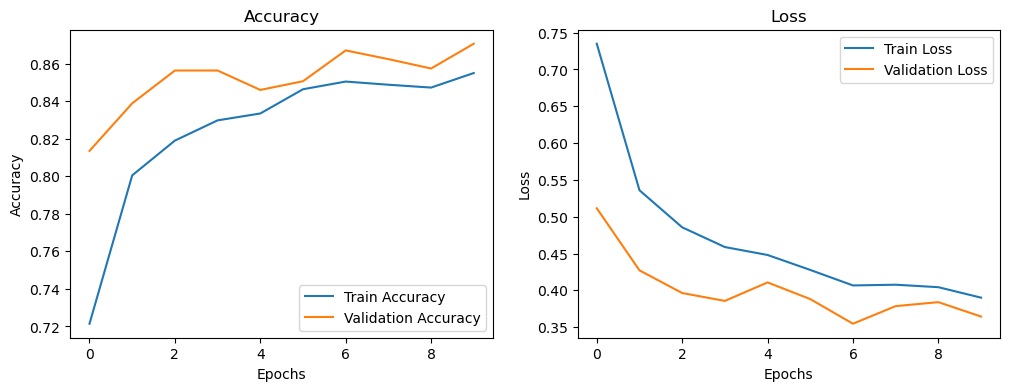

In [53]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
